<a href="https://colab.research.google.com/github/obasekore/AI-bootCamp/blob/main/Project_Based_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML in Code

In [ ]:
#@title What do I need to install
!pip install pandas

In [1]:
#@title What do I need to import?
import pandas as pd

In [2]:
#@title How do I load data in Python?
columns_to_read = ['TRIP_MILES', 'FARE', 'TRIP_SECONDS', 'TIP_RATE']
df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv', usecols=columns_to_read)
# https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv

In [3]:
#@title Preview some samples
df.head()

,TRIP_SECONDS,TRIP_MILES,FARE,TIP_RATE
0,2341,2.57,31.99,6.3
1,1074,1.18,9.75,27.9
2,1173,1.29,10.25,0.0
3,3360,3.70,23.75,0.0
4,1044,1.15,10.00,0.0


In [4]:
#@title Statistical Summary
df.describe()

,TRIP_SECONDS,TRIP_MILES,FARE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694.000000
mean,1319.796397,8.289463,23.905210,12.965785
std,928.932873,7.265672,16.970022,15.517765
min,60.000000,0.500000,3.250000,0.000000
25%,548.000000,1.720000,9.000000,0.000000
50%,1081.000000,5.920000,18.750000,12.200000
75%,1888.000000,14.500000,38.750000,20.800000
max,7140.000000,68.120000,159.250000,648.600000


In [ ]:
#@title Determine the suitable features
df.corr()

#

array([[<Axes: xlabel='TRIP_SECONDS', ylabel='TRIP_SECONDS'>,
        <Axes: xlabel='TRIP_MILES', ylabel='TRIP_SECONDS'>,
        <Axes: xlabel='FARE', ylabel='TRIP_SECONDS'>,
        <Axes: xlabel='TIP_RATE', ylabel='TRIP_SECONDS'>],
       [<Axes: xlabel='TRIP_SECONDS', ylabel='TRIP_MILES'>,
        <Axes: xlabel='TRIP_MILES', ylabel='TRIP_MILES'>,
        <Axes: xlabel='FARE', ylabel='TRIP_MILES'>,
        <Axes: xlabel='TIP_RATE', ylabel='TRIP_MILES'>],
       [<Axes: xlabel='TRIP_SECONDS', ylabel='FARE'>,
        <Axes: xlabel='TRIP_MILES', ylabel='FARE'>,
        <Axes: xlabel='FARE', ylabel='FARE'>,
        <Axes: xlabel='TIP_RATE', ylabel='FARE'>],
       [<Axes: xlabel='TRIP_SECONDS', ylabel='TIP_RATE'>,
        <Axes: xlabel='TRIP_MILES', ylabel='TIP_RATE'>,
        <Axes: xlabel='FARE', ylabel='TIP_RATE'>,
        <Axes: xlabel='TIP_RATE', ylabel='TIP_RATE'>]], dtype=object)

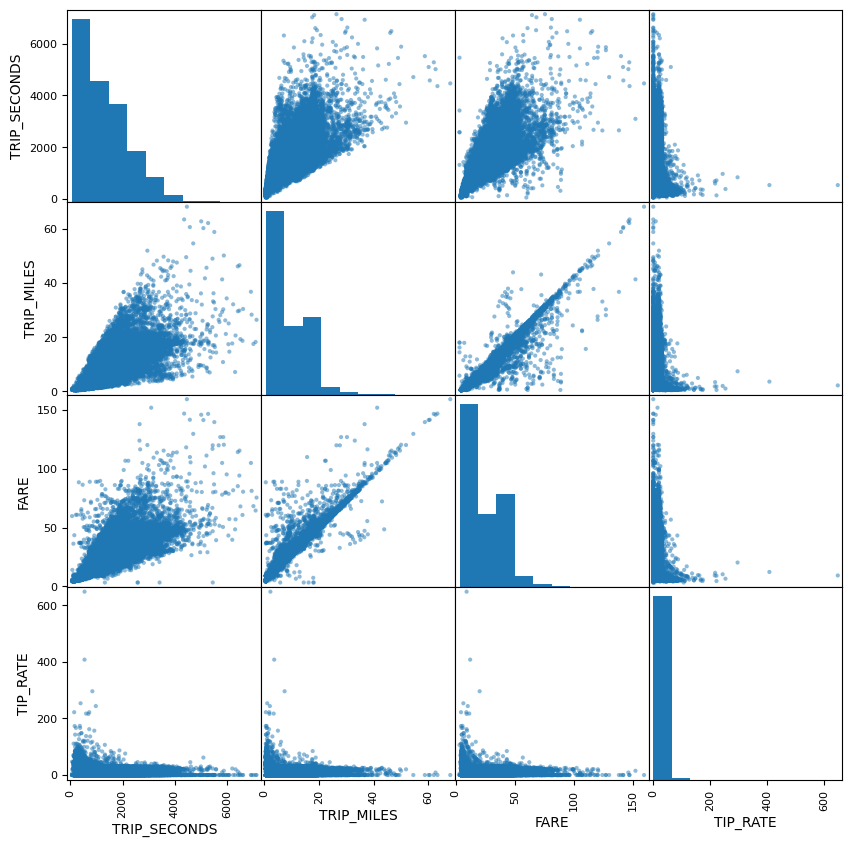

In [5]:
#@title Visualizing suitable features
pd.plotting.scatter_matrix(df, figsize=(10, 10))

# Training Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [7]:
#@title Split the data
train_df, test_df = train_test_split(df, test_size=0.2)

In [8]:
#@title selected features
input_column = ['TRIP_MILES']
output_column = ['FARE']

In [9]:
#@title Training data
X_train = train_df[input_column]
Y_train = train_df[output_column]

In [10]:
#@title Testing data
X_test = test_df[input_column]
Y_test = test_df[output_column]

In [11]:
#@title Define model
model = LinearRegression()

In [12]:
#@title training model
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
#@title Parameters learned by model
model.coef_, model.intercept_

(array([[2.27933861]]), array([5.01146839]))

In [39]:
y_regression_line = model.coef_ * X_test + model.intercept_

In [14]:
#@title Test model
y_predict = model.predict(X_test)

In [15]:
#@title Quantify the model performance
model.score(X_test, Y_test)

0.9498976668301331

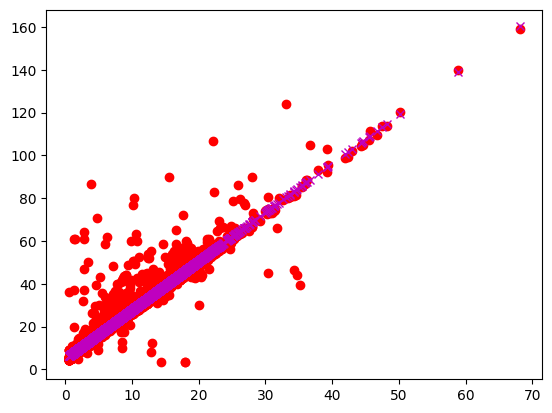

In [16]:
plt.plot(X_test, Y_test, 'ro')
plt.plot(X_test, y_predict, 'mx')
# plt.plot(X_test, y_regression_line, 'b')
plt.show()

# Better performance

In [17]:
#@title Neural Network
model_mlp = MLPRegressor(max_iter=20,
                         hidden_layer_sizes=(2,),
                         learning_rate='constant',
                         learning_rate_init=0.001,
                         batch_size=50,
                         verbose = True)

In [18]:
model_mlp.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 324.51445910
Iteration 2, loss = 71.79338333
Iteration 3, loss = 10.10618779
Iteration 4, loss = 7.65587556
Iteration 5, loss = 7.47891418
Iteration 6, loss = 7.31988512
Iteration 7, loss = 7.17772090
Iteration 8, loss = 7.07634194
Iteration 9, loss = 7.00115268
Iteration 10, loss = 6.96310867
Iteration 11, loss = 6.93891896
Iteration 12, loss = 6.92355212
Iteration 13, loss = 6.89332588
Iteration 14, loss = 6.86932484
Iteration 15, loss = 6.84768326
Iteration 16, loss = 6.82750403
Iteration 17, loss = 6.81632192
Iteration 18, loss = 6.80467390
Iteration 19, loss = 6.79644472
Iteration 20, loss = 6.79420599


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=50, hidden_layer_sizes=(2,), max_iter=20, verbose=True)

In [19]:
y_predict = model_mlp.predict(X_test)
model_mlp.score(X_test, Y_test)

0.9509083945079702

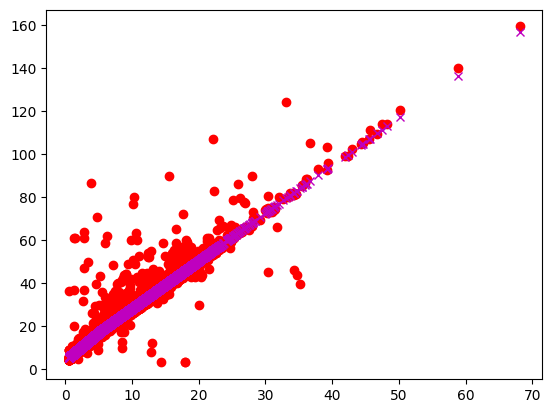

In [20]:
plt.plot(X_test, Y_test, 'ro')
plt.plot(X_test, y_predict, 'mx')

In [64]:
model_mlp.coefs_

[array([[0.2607217, 1.505201 ]]),
 array([[1.98013042],
        [1.17049597]])]

In [65]:
model_mlp.intercepts_

[array([1.68595436, 1.98712453]), array([-0.67119371])]